In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
df = pd.read_csv('../data/interim/history_extracted_data.csv')
for i in df.columns:
    print(i)

Unnamed: 0
kast0
kast1
kast10
kast11
kast12
kast13
kast14
kast2
kast20
kast21
kast22
kast23
kast24
kast3
kast30
kast31
kast32
kast33
kast34
kast4
kast40
kast41
kast42
kast43
kast44
kd0
kd1
kd10
kd11
kd12
kd13
kd14
kd2
kd20
kd21
kd22
kd23
kd24
kd3
kd30
kd31
kd32
kd33
kd34
kd4
kd40
kd41
kd42
kd43
kd44
losing_stats0
losing_stats1
losing_stats2
losing_stats3
losing_stats4
map_name0
map_name1
map_name2
map_name3
map_name4
opponent
player0
player1
player10
player11
player12
player13
player14
player2
player20
player21
player22
player23
player24
player3
player30
player31
player32
player33
player34
player4
player40
player41
player42
player43
player44
pm0
pm1
pm10
pm11
pm12
pm13
pm14
pm2
pm20
pm21
pm22
pm23
pm24
pm3
pm30
pm31
pm32
pm33
pm34
pm4
pm40
pm41
pm42
pm43
pm44
rating0
rating1
rating10
rating11
rating12
rating13
rating14
rating2
rating20
rating21
rating22
rating23
rating24
rating3
rating30
rating31
rating32
rating33
rating34
rating4
rating40
rating41
rating42
rating43
rating44
started_as

/home/joakim/programming/virtualenvs/csgo-wiz/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22,23,24,25,46,47,48,49,50,60,82,83,84,85,86,141,143,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
navi_data = df.loc[df['team'] == 'Natus Vincere']

# Convert into all mathes into bo1
games = [0, 1, 2, 3, 4]
player_features = ['player', 'kast', 'kd', 'pm', 'rating']
features = ['map_name', 'win', 'winning_stats', 'losing_stats', 'started_as']
game_features = ['team', 'opponent']

all_games = list()
for index, row in df.iterrows():
    for game in games:
        game_stats = list()
        game_stats.extend(row[game_features])
        for feature in features:
            game_stats.append(row[feature+str(game)])
        for player in range(5):
            for feature in player_features:
                game_stats.append(row[feature+str(game*10+player)])
                
        all_games.append(game_stats)

feature_names = list(game_features)
feature_names.extend(features)
for i in range(5):
    feature_names.extend([feature+str(i) for feature in player_features])
new_data = pd.DataFrame(all_games, columns=feature_names)

       winning_stats  losing_stats           pm0       rating0           pm1  \
count   29170.000000  29170.000000  29134.000000  29134.000000  29146.000000   
mean       16.216284      9.152177      0.631667      1.096581      0.478042   
std         1.071967      4.089026      7.372697      0.358672      7.245144   
min         4.000000      0.000000    -28.000000      0.110000    -20.000000   
25%        16.000000      6.000000     -5.000000      0.850000     -5.000000   
50%        16.000000      9.000000      0.000000      1.080000      0.000000   
75%        16.000000     12.000000      6.000000      1.320000      6.000000   
max        34.000000     32.000000     30.000000      3.040000     27.000000   

            rating1           pm2       rating2           pm3       rating3  \
count  29146.000000  29130.000000  29130.000000  29127.000000  29127.000000   
mean       1.088252      0.573292      1.093627      0.591410      1.094978   
std        0.350710      7.342029      0.3

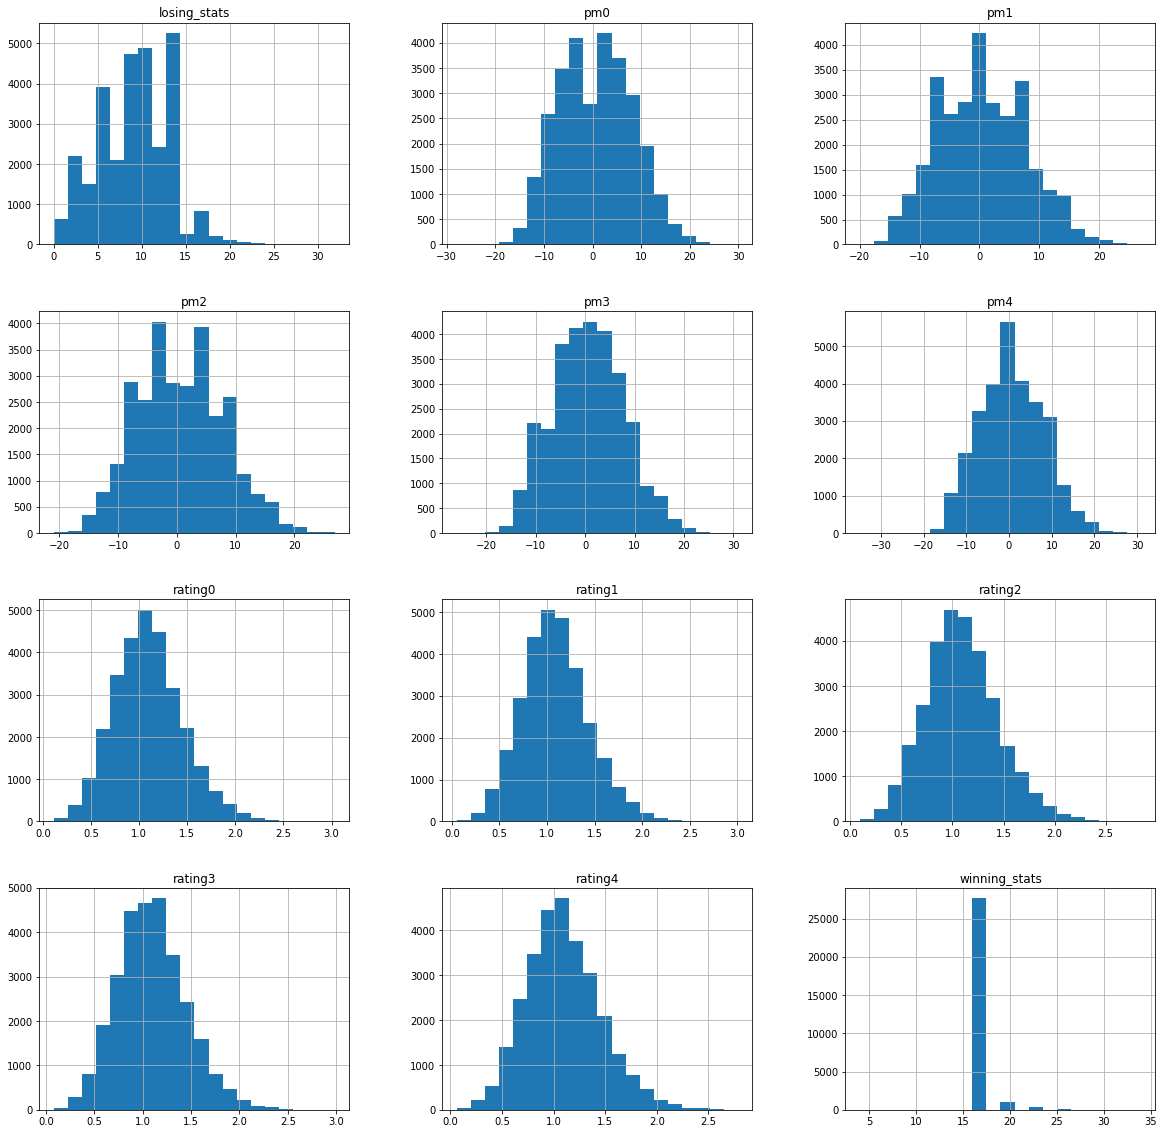

In [94]:
print(new_data.describe())
new_data.hist(figsize=(20,20), bins=20)
plt.show()

In [126]:
f = ['kd0', 'kd1', 'kd2', 'kd3', 'kd4']
for i, k in enumerate(f):
    a = new_data[k].values
    a = np.array([s.split('-') if type(s) is str else [s, s] for s in a], dtype=np.float32)
    
    new_data['kills'+str(i)] = a[:, 0]
    new_data['deaths'+str(i)] = a[:, 1]
    new_data.drop(columns=k)

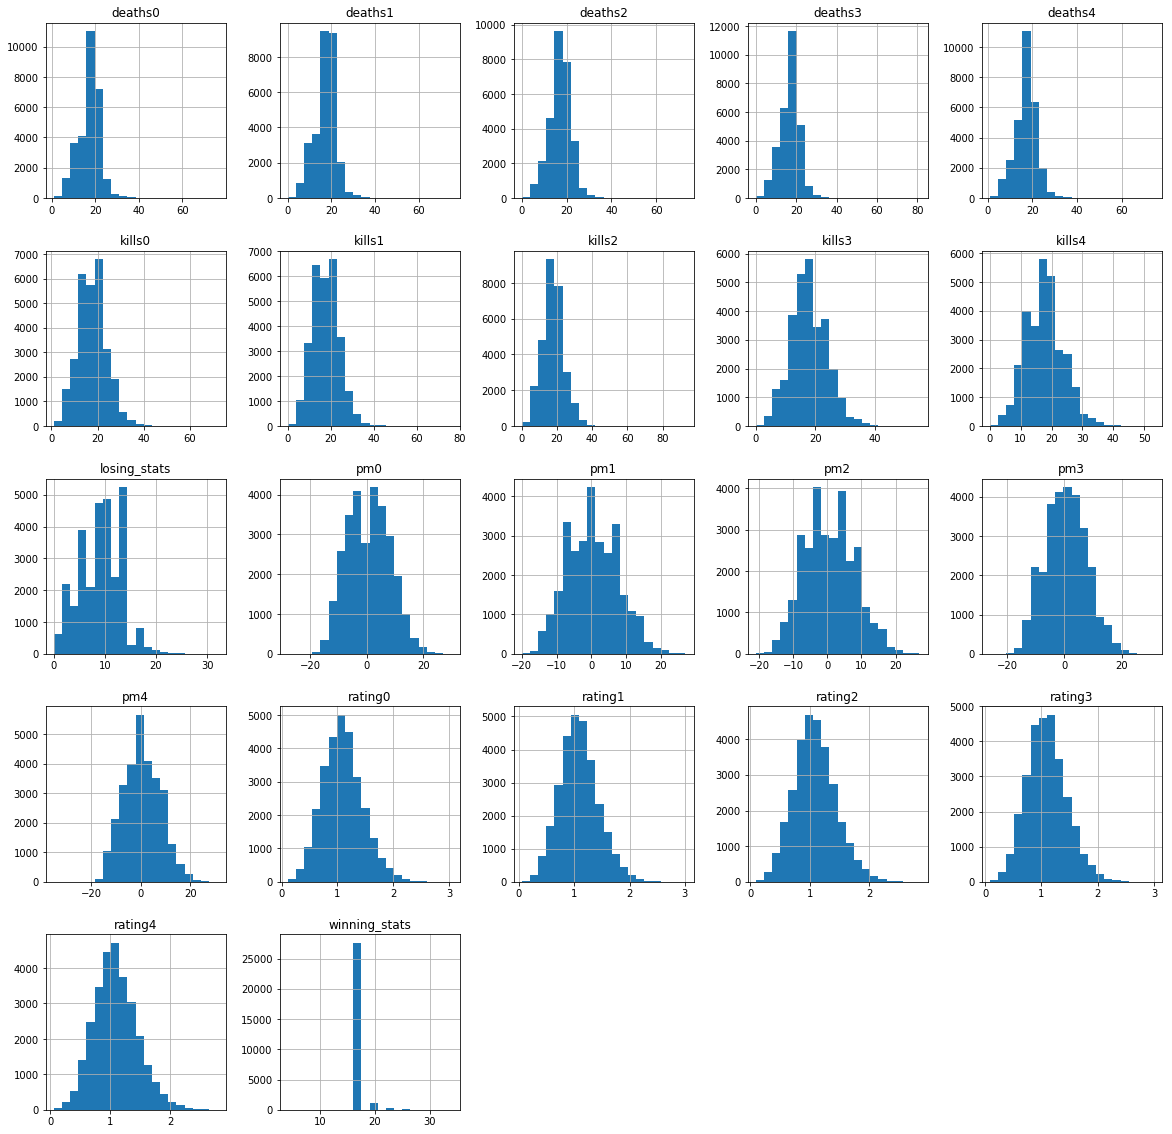

In [127]:
new_data.hist(figsize=(20,20), bins=20)
plt.show()

In [134]:
for c in new_data.columns:
    print(c)
new_data.dropna(inplace=True)
new_data.win = new_data.win.astype(int)
new_data.describe()

team
opponent
map_name
win
winning_stats
losing_stats
started_as
player0
kast0
kd0
pm0
rating0
player1
kast1
kd1
pm1
rating1
player2
kast2
kd2
pm2
rating2
player3
kast3
kd3
pm3
rating3
player4
kast4
kd4
pm4
rating4
kills0
deaths0
kills1
deaths1
kills2
deaths2
kills3
deaths3
kills4
deaths4


win  winning_stats  losing_stats           pm0       rating0  \
count  28983.000000   28983.000000  28983.000000  28983.000000  28983.000000   
mean       0.548632      16.216748      9.154366      0.631543      1.096589   
std        0.497638       1.073299      4.089298      7.372902      0.358593   
min        0.000000       4.000000      0.000000    -28.000000      0.110000   
25%        0.000000      16.000000      6.000000     -5.000000      0.850000   
50%        1.000000      16.000000      9.000000      0.000000      1.080000   
75%        1.000000      16.000000     12.000000      6.000000      1.320000   
max        1.000000      34.000000     32.000000     30.000000      3.040000   

                pm1       rating1           pm2       rating2           pm3  \
count  28983.000000  28983.000000  28983.000000  28983.000000  28983.000000   
mean       0.482248      1.088493      0.575096      1.093650      0.592002   
std        7.243430      0.350651      7.342570      0.357865      7.277798   
min      -20.000000      0.050000    -21.000000      0.090000    -26.000000   
25%       -5.000000      0.850000     -5.000000      0.850000     -5.000000   
50%        0.000000      1.070000      0.000000      1.070000      0.000000   
75%        6.000000      1.310000      6.000000      1.320000      6.000000   
max       27.000000      3.010000     27.000000      2.850000     31.000000   

            rating3           pm4       rating4        kills0       deaths0  \
count  28983.000000  28983.000000  28983.000000  28983.000000  28983.000000   
mean       1.095035      0.562364      1.094713     17.751854     17.120312   
std        0.354374      7.359118      0.359262      6.116802      4.770047   
min        0.080000    -35.000000      0.060000      1.000000      1.000000   
25%        0.850000     -5.000000      0.850000     14.000000     14.000000   
50%        1.070000      0.000000      1.070000     18.000000     18.000000   
75%        1.310000      6.000000      1.320000     22.000000     20.000000   
max        2.990000     31.000000      2.790000     72.000000     76.000000   

             kills1       deaths1        kills2       deaths2        kills3  \
count  28983.000000  28983.000000  28983.000000  28983.000000  28983.000000   
mean      17.572956     17.090708     17.693233     17.118137     17.751234   
std        6.017249      4.788460      6.106403      4.757241      6.070118   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.000000     14.000000     14.000000     14.000000     14.000000   
50%       17.000000     18.000000     17.000000     18.000000     18.000000   
75%       21.000000     20.000000     21.000000     20.000000     22.000000   
max       76.000000     75.000000     93.000000     73.000000     55.000000   

            deaths3        kills4       deaths4  
count  28983.000000  28983.000000  28983.000000  
mean      17.159231     17.703068     17.140703  
std        4.762028      6.065239      4.760282  
min        0.000000      0.000000      1.000000  
25%       14.000000     14.000000     14.000000  
50%       18.000000     18.000000     18.000000  
75%       20.000000     22.000000     20.000000  
max       81.000000     53.000000     74.000000